In [1]:
# imoprt needed packages
import numpy as np

import utilities_visuals as ut

import ArgModel as normal_am
import reducedArgModel as reduced_am

In [2]:
# defines the parameters needed to run the model
params = {
    "no_of_agents": 1078,
    "no_of_iterations": 2000,
    # strength of biased processing
    "ß": 3.2,
    # Number of implicitely modelled arguments
    "C": 8,
    # binary variable indicating what data to return at the end of the simulation
    "SPA": False}

# simulates a model run and saves the returned data for later use
loal = reduced_am.simulate_agent_interaction(params["no_of_agents"], params["no_of_iterations"], params["C"],
                                             params["ß"], params["SPA"])


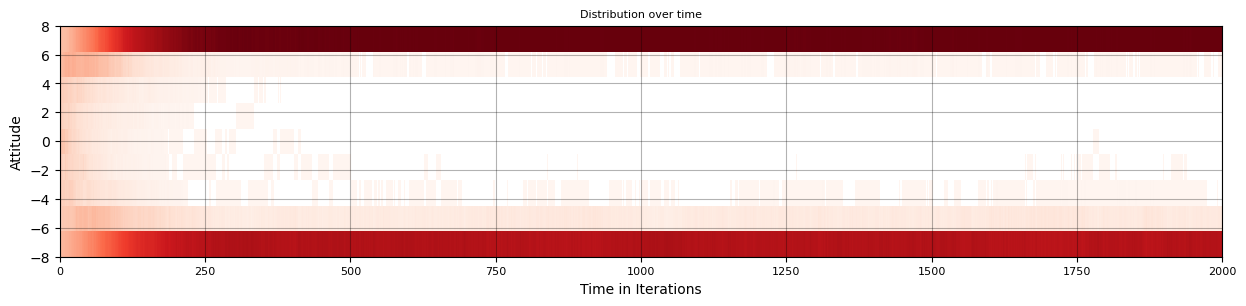

In [3]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(loal, 9, params["C"])

In [4]:
# defines the parameters needed to run the model
params = {
    "no_of_agents": 1078,
    "no_of_iterations" : 2000,
    # strength of biased processing
    "ß": 0.8,
    # linkage matrix
    "C": np.asmatrix([1, 1, 1, 1, -1, -1, -1, -1], dtype=np.float64),
    # binary variable indicating what data to return at the end of the simulation
    "SPA": False}

loal = normal_am.simulate_agent_interaction(params["no_of_agents"], params["no_of_iterations"], params["ß"],
                                                  params["C"], params["SPA"])

# changes the data type of the variable from list of 2d-arrays to a 3d-array
#matr = ut.rearrange_attitude_list(loal)

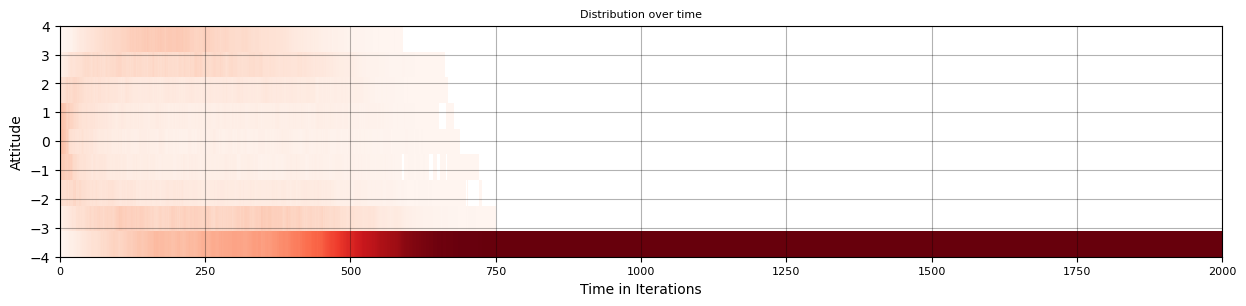

In [5]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(loal, 9, params["C"])